# Pokemon Dataset#

 Pokemon was introduced as a game through Pokemon Red and Blue and with its success, it has been integrated into several media forms such as animated TV series, animated movies, live action movies and even memes.<br>

Within the early stages of Pokemon, there were only 151 pokemons which would be quite easy to derive general information about them. But with many changes and additions to the Pokedex, there are a multitude of Pokemon with around 800 of them. Alongside with current technology, we can start seeing whether we can at least give knowledge or insight to those who are not familiar with Pokemon<br>

We have gathered a dataset which contains the list of pokemon and their general stats. Alongside with this dataset, there are a few questions which we would like to have answered:<br>


* What are the strongest and weakest pokemons? *COMPLETE*
* Are there any correlations between stats ? What kind of correlations exist and between what pairs? *COMPLETE*
* Which type of pokemon has the strongest base stats and total stats? *COMPLETE*
* With a given dataset, are we able to create a prediction model for whether a pokemon is legendary or not? *COMPLETE*

<br>
Let's first get started by importing our Python packages and cleaning the data.

## Data Cleaning ##

In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Top 5 Lines of the table
data = pd.read_csv('pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
#Cleaning up column names
data.rename(columns = {'Name':'name', 
                       'Type 1':'type_1',
                       'Type 2': 'type_2',
                      'Total': 'total',
                      'HP':'hp',
                      'Attack' : 'attack',
                      'Defense':'defense',
                      'Sp. Atk':'sp_attack',
                      'Sp. Def':'sp_defense',
                      'Speed':'speed',
                      'Generation':'generation',
                      'Legendary':'legendary',
                      '#':'number'},inplace = True)
data.head()

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#We can Identify that there are missing values within our dataset and now let's investigate which columns this is in.
data.isnull().any()

number        False
name          False
type_1        False
type_2         True
total         False
hp            False
attack        False
defense       False
sp_attack     False
sp_defense    False
speed         False
generation    False
legendary     False
dtype: bool

In [5]:
data[data['type_2'].isnull()].head()
#Some Pokemons are supposedly having 2 types where as some only have 1. This column is crucial to our analysis so we will
#Remove any rows related to NaN

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


## Anaylsis ##

### Strongest Pokemons ###
Let's have a quick glimpse at our strongest pokemons.

In [6]:
data.sort_values('total' ,ascending=False).head(15)

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


As much as our Pokemons being strong, most of them seem to be either a legendary pokemon or a transformed version of the original Pokemon. For now, let's remove all Legendary and transformed versions from the dataset.

In [7]:
#Transforming Data
normalpkm = data.copy()
normalpkm = normalpkm[normalpkm['legendary'] == False]
normalpkm = normalpkm[~normalpkm['name'].str.contains('Mega')]
normalpkm = normalpkm[~normalpkm['name'].str.contains('Forme')]
normalpkm = normalpkm[~normalpkm['name'].str.contains('Zen')]

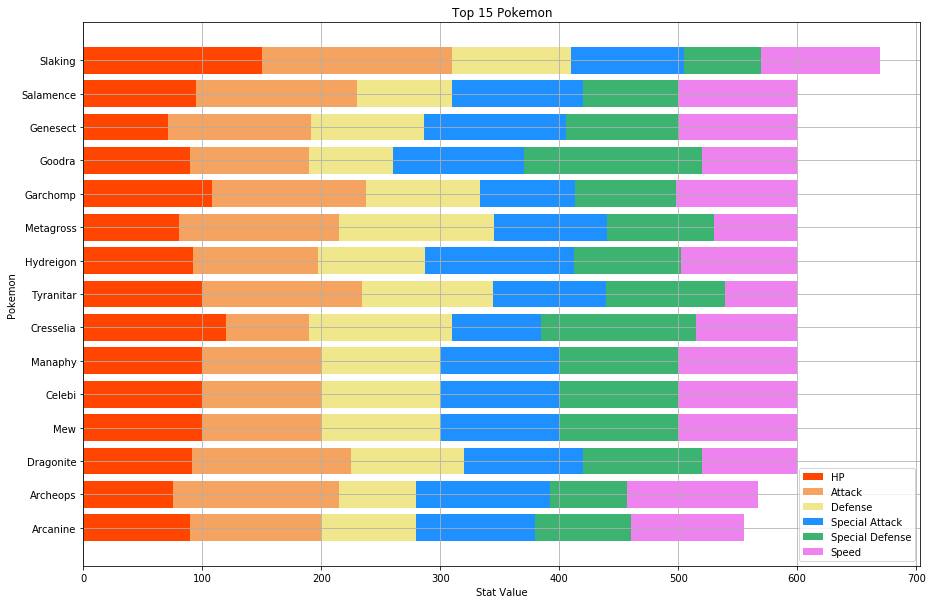

In [8]:
#Top 15 Pokemons Graph
topnormalpkm = normalpkm.sort_values(by = ['total'] ,ascending=False).head(15)
y_pos =np.arange(len(topnormalpkm['total']))

plt.figure(figsize=(15,10))
plt.gca().invert_yaxis()

p1 = topnormalpkm['hp']
p2 = np.add(p1,topnormalpkm['attack'])
p3 = np.add(p2,topnormalpkm['defense'])
p4 = np.add(p3,topnormalpkm['sp_attack'])
p5 = np.add(p4,topnormalpkm['sp_defense'])

plt.barh(topnormalpkm['name'],topnormalpkm['hp'].tolist(), color = 'orangered')
plt.barh(topnormalpkm['name'],topnormalpkm['attack'],left = p1.tolist(),color = 'sandybrown')
plt.barh(topnormalpkm['name'],topnormalpkm['defense'],left = p2.tolist(),color = 'khaki')
plt.barh(topnormalpkm['name'],topnormalpkm['sp_attack'],left = p3.tolist(),color = 'dodgerblue')
plt.barh(topnormalpkm['name'],topnormalpkm['sp_defense'],left = p4.tolist(),color = 'mediumseagreen')
plt.barh(topnormalpkm['name'],topnormalpkm['speed'],left = p5.tolist(),color = 'violet')

plt.title('Top 15 Pokemon')
plt.xlabel('Stat Value')
plt.ylabel('Pokemon')
plt.grid()
plt.legend(('HP','Attack','Defense','Special Attack','Special Defense','Speed'))

plt.show()

Based on the given dataset of the Top 15 Pokemons:

- Slaking has the highest base total stat with <b> 670 </b> with its HP and Attack contributing to nearly half of its stats. As a note, Slaking does take a break after an action which may explain the unexpected results (meaning 1 action in 2 turns).
- 80% of the top 15 Pokemon seem to have the same total value of <b> 600 </b> This may explain what the top contending Pokemons are in each generation.
- Manaphy, Celebi and Mew all have <b> 600 </b> with all its total split equally between all stats.
- Initial stages of Pokemon would categorize Manaphy, Celebi, Genesect, Cresselia and Mew as Legendary Pokemons but they are actually considered as a category under 'Mythical' which is not listed within our dataset.

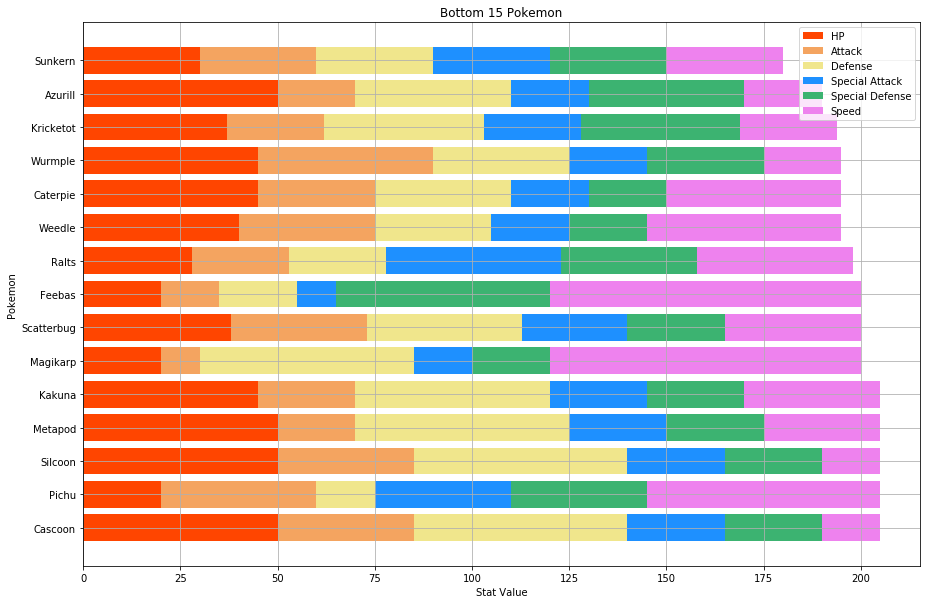

In [9]:
#Bottom 15 Pokemons
bottomnormalpkm = normalpkm.sort_values(by = ['total'] ,ascending=True).head(15)
y_pos =np.arange(len(bottomnormalpkm['total']))

plt.figure(figsize=(15,10))

p1 = bottomnormalpkm['hp']
p2 = np.add(p1,bottomnormalpkm['attack'])
p3 = np.add(p2,bottomnormalpkm['defense'])
p4 = np.add(p3,bottomnormalpkm['sp_attack'])
p5 = np.add(p4,bottomnormalpkm['sp_defense'])

plt.barh(bottomnormalpkm['name'],bottomnormalpkm['hp'].tolist(), color = 'orangered')
plt.barh(bottomnormalpkm['name'],bottomnormalpkm['attack'],left = p1.tolist(),color ='sandybrown')
plt.barh(bottomnormalpkm['name'],bottomnormalpkm['defense'],left = p2.tolist(),color = 'khaki')
plt.barh(bottomnormalpkm['name'],bottomnormalpkm['sp_attack'],left = p3.tolist(),color = 'dodgerblue')
plt.barh(bottomnormalpkm['name'],bottomnormalpkm['sp_defense'],left = p4.tolist(),color = 'mediumseagreen')
plt.barh(bottomnormalpkm['name'],bottomnormalpkm['speed'],left = p5.tolist(),color = 'violet')

plt.grid()
plt.xlabel('Stat Value')
plt.ylabel('Pokemon')
plt.title('Bottom 15 Pokemon')
plt.legend(('HP','Attack','Defense','Special Attack','Special Defense','Speed'))
plt.gca().invert_yaxis()

plt.show()

Based on the given graph of the bottom 15 Pokemons:

- Sunkern showing the lowest values with a total stat of <b> 180 </b>. It seems that similar to the Mythical Pokemons, Sunkerns values are split evenly across with around 30 each.
- The distribution of stats seems to fluctuate significantly in comparison to the top 15 pokemons with Magikarp and Feebas having relatively low HP and attack with high Speed and Defense/Sp Defense
- There are some Pokemons which have relatively similar stats within different generations. Silcoon and Cascoon (Gen 3) have the same stats across the board whereas Kakuna and Metapod (Gen 1) have different stats. This may be because of Metapod and Kakuna were evolved from 2 different pokemons whereas Silcoon and Cascoon were evolved from 1 Pokemon
- Comparing Weedle and Caterpie, Weedle seems to be the more aggresive one with higher attack and speed with less defense and hp than Caterpie with their evolutions following through.

The above shows general splits between all Pokemons but what about Pokemons in their own Generations?

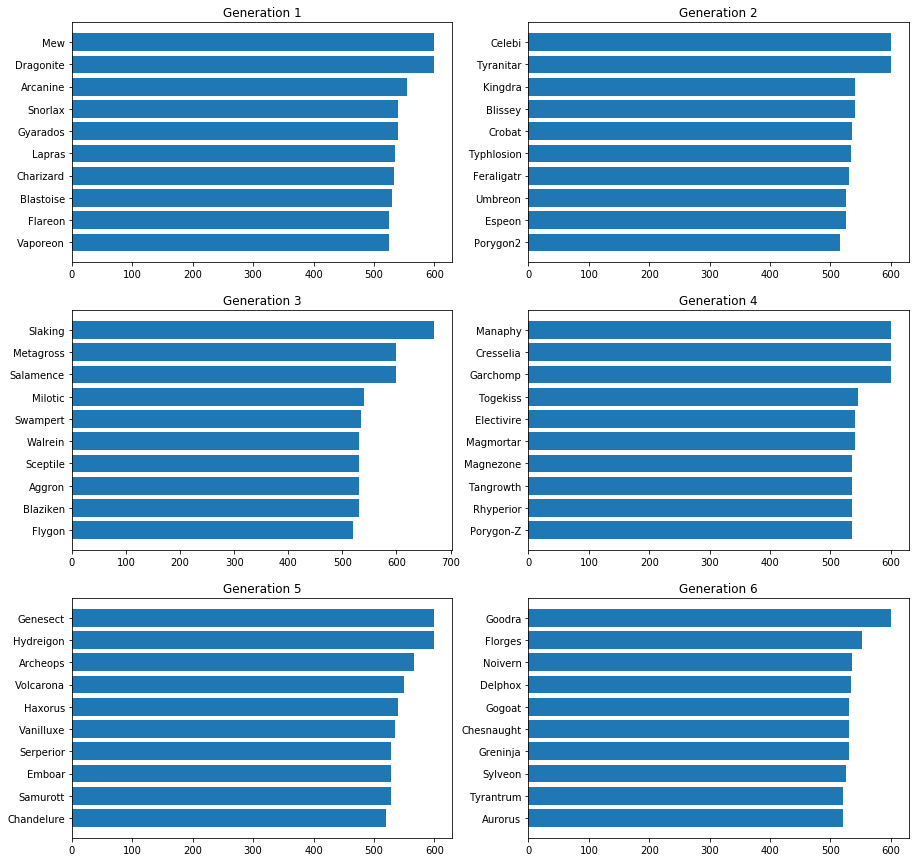

In [10]:
#Segragating Top 10 Pokemons into their respective generations
top10g1 = normalpkm[normalpkm.generation == 1].sort_values(by=['total'],ascending = False).head(10)
top10g2 = normalpkm[normalpkm.generation == 2].sort_values(by=['total'],ascending = False).head(10)
top10g3 = normalpkm[normalpkm.generation == 3].sort_values(by=['total'],ascending = False).head(10)
top10g4 = normalpkm[normalpkm.generation == 4].sort_values(by=['total'],ascending = False).head(10)
top10g5 = normalpkm[normalpkm.generation == 5].sort_values(by=['total'],ascending = False).head(10)
top10g6 = normalpkm[normalpkm.generation == 6].sort_values(by=['total'],ascending = False).head(10)

plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.barh(top10g1['name'],top10g1['total'])
plt.title('Generation 1')
plt.gca().invert_yaxis()

plt.subplot(3,2,2)
plt.barh(top10g2['name'],top10g2['total'])
plt.title('Generation 2')
plt.gca().invert_yaxis()

plt.subplot(3,2,3)
plt.barh(top10g3['name'],top10g3['total'])
plt.title('Generation 3')
plt.gca().invert_yaxis()

plt.subplot(3,2,4)
plt.barh(top10g4['name'],top10g4['total'])
plt.title('Generation 4')
plt.gca().invert_yaxis()

plt.subplot(3,2,5)
plt.barh(top10g5['name'],top10g5['total'])
plt.title('Generation 5')
plt.gca().invert_yaxis()

plt.subplot(3,2,6)
plt.barh(top10g6['name'],top10g6['total'])
plt.title('Generation 6')
plt.gca().invert_yaxis()

After observing the following dataset:

- As expected, most of the top pokemon in their generations are classified as Mythical Pokemons. Generation 3 and 6 do not have any Pokemons which do not contain any mythical.
- Other than Slaking, the top Pokemon in each Generation have a total stat of 600.

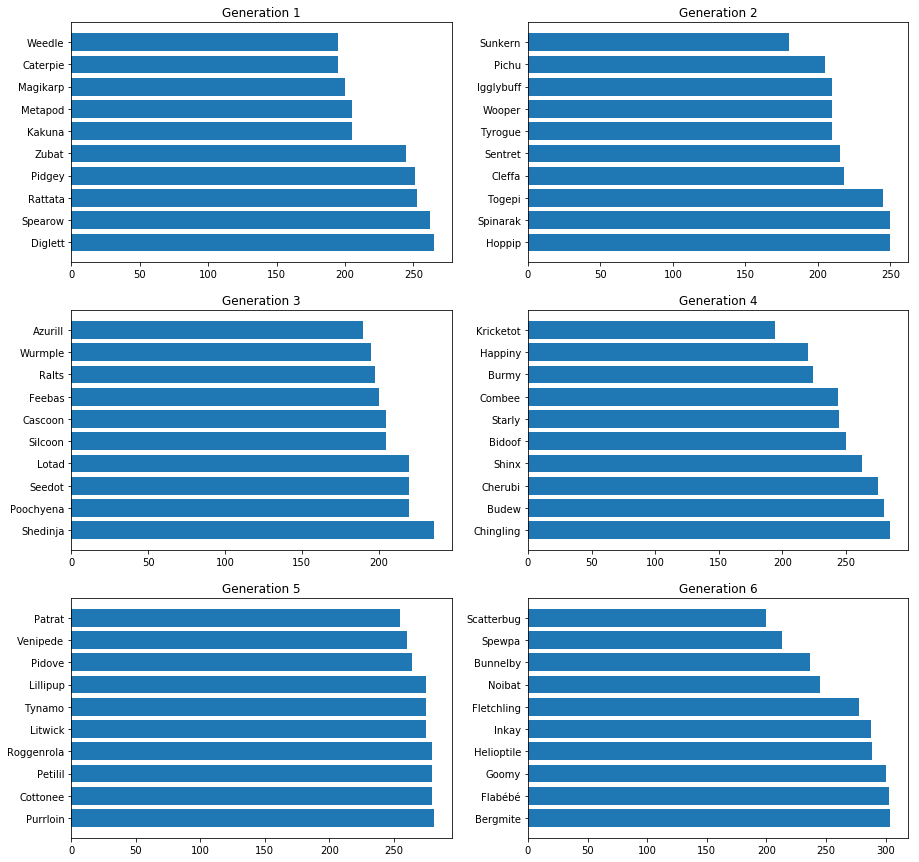

In [11]:
#Segragating Bottom 10 Pokemons into Generations
bottom10g1 = normalpkm[normalpkm.generation == 1].sort_values(by=['total'],ascending = True).head(10)
bottom10g2 = normalpkm[normalpkm.generation == 2].sort_values(by=['total'],ascending = True).head(10)
bottom10g3 = normalpkm[normalpkm.generation == 3].sort_values(by=['total'],ascending = True).head(10)
bottom10g4 = normalpkm[normalpkm.generation == 4].sort_values(by=['total'],ascending = True).head(10)
bottom10g5 = normalpkm[normalpkm.generation == 5].sort_values(by=['total'],ascending = True).head(10)
bottom10g6 = normalpkm[normalpkm.generation == 6].sort_values(by=['total'],ascending = True).head(10)

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.barh(bottom10g1['name'],bottom10g1['total'])
plt.title('Generation 1')
plt.gca().invert_yaxis()

plt.subplot(3,2,2)
plt.barh(bottom10g2['name'],bottom10g2['total'])
plt.title('Generation 2')
plt.gca().invert_yaxis()

plt.subplot(3,2,3)
plt.barh(bottom10g3['name'],bottom10g3['total'])
plt.title('Generation 3')
plt.gca().invert_yaxis()

plt.subplot(3,2,4)
plt.barh(bottom10g4['name'],bottom10g4['total'])
plt.title('Generation 4')
plt.gca().invert_yaxis()

plt.subplot(3,2,5)
plt.barh(bottom10g5['name'],bottom10g5['total'])
plt.title('Generation 5')
plt.gca().invert_yaxis()

plt.subplot(3,2,6)
plt.barh(bottom10g6['name'],bottom10g6['total'])
plt.title('Generation 6')
plt.gca().invert_yaxis()

## Correlation ##
<br>
What we want to look into now is if there are any strong correlations between statistics.

In [12]:
corrdf = normalpkm[['hp','attack','defense','sp_attack','sp_defense','speed','total']]
corrdf.corr().mul(100).astype(int)

,hp,attack,defense,sp_attack,sp_defense,speed,total
hp,100,38,16,29,32,9,60
attack,38,100,41,23,14,26,67
defense,16,41,100,15,44,-6,58
sp_attack,29,23,15,100,45,37,67
sp_defense,32,14,44,45,100,18,67
speed,9,26,-6,37,18,100,49
total,60,67,58,67,67,49,100


A general consensus shows that the higher stats of the pokemon, the higher the total value which makes sense. Other than that, notable correlations would include the combination of:

- HP and Attack
- Attack and Defense
- Special Attack and Special Defense
- Defense and Special Defense

### HP and Attack ###

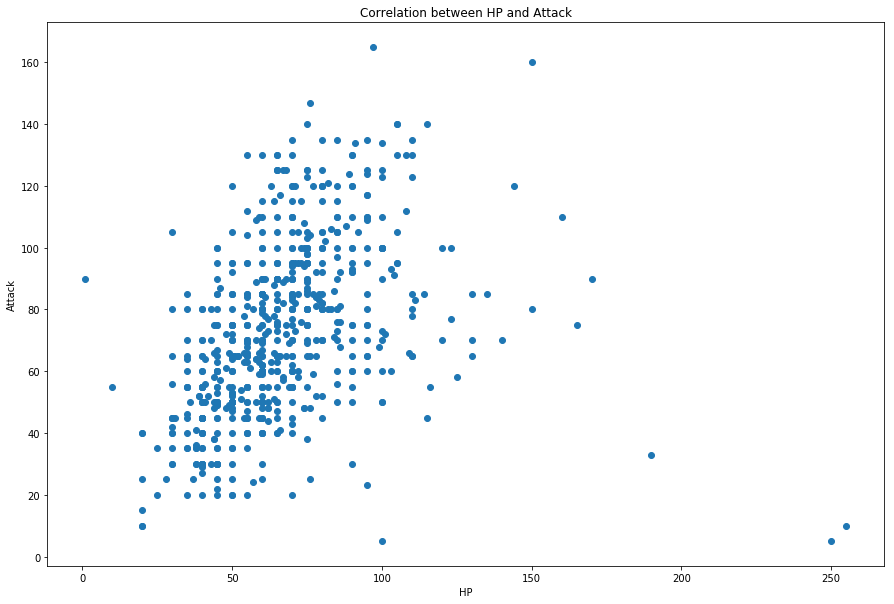

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(corrdf['hp'],corrdf['attack'])
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Correlation between HP and Attack')
plt.show()

We can see a positive correlation going between HP and Attack in general. What has thrown the correlation value between the two seems to be two values which have significantly high hp with low attack. Let's see whether we can find these pokemons.

In [14]:
normalpkm[normalpkm['hp'] >= 250]

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


Seems like the two pokemon which has thrown the values off are Chansey and their eveolution Blissey with incredibly nonexistent attack. These pokemon seem to have the highest values in terms of HP out of all the normal pokemon which is offset from their low attack and defense.

### Attack and Defense ###

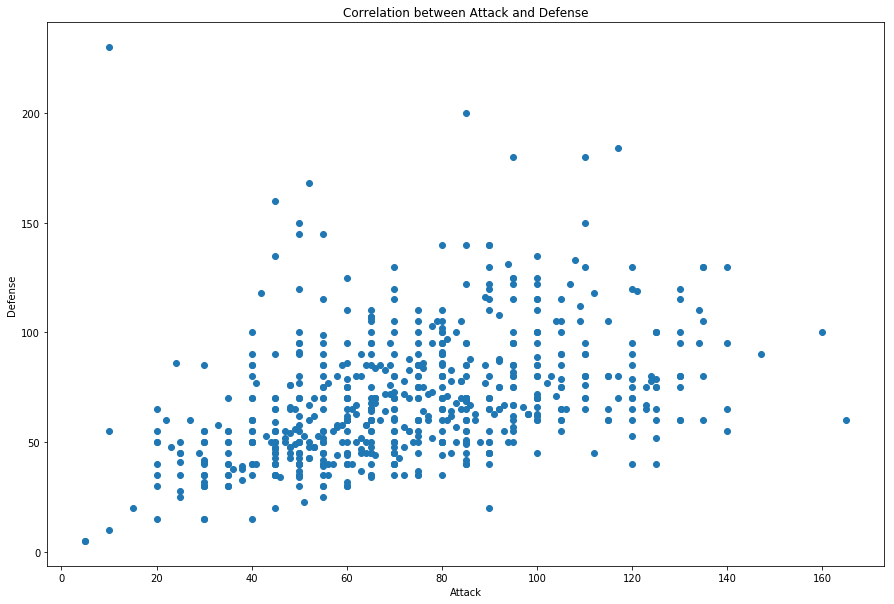

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(corrdf['attack'],corrdf['defense'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Correlation between Attack and Defense')
plt.show()

Another relatively positive trend between attack and defense. We seems to have an outlier again with extremely low attack with high defense however.

In [16]:
normalpkm[normalpkm['defense'] > 200]

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


Similar to the correlation between HP and Attack, Shuckles seems to have offset their damage to have an insange amount of defense and special defense. 

### Special Attack and Special Defense ###

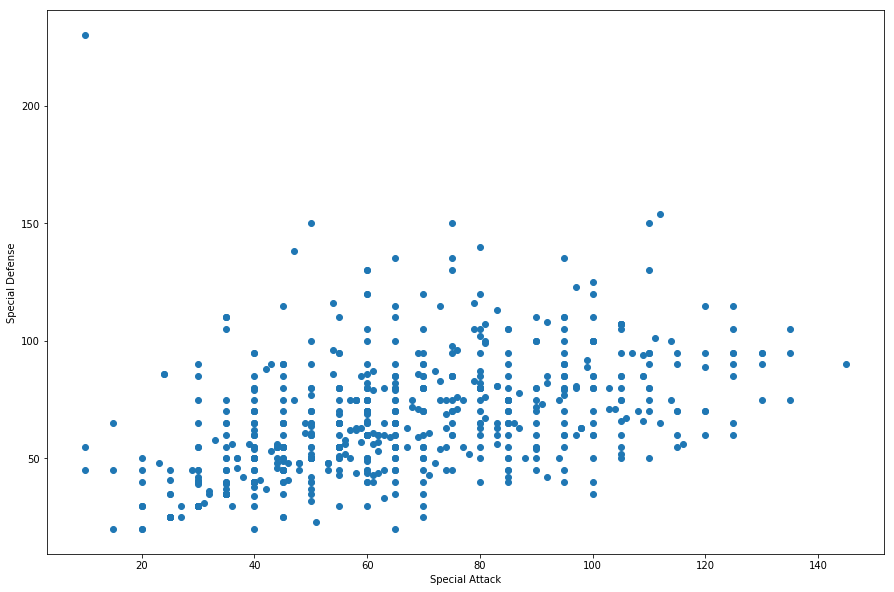

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(corrdf['sp_attack'],corrdf['sp_defense'])
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')
plt.show()

Another generally positive trend between the two metrics with another outlier shown. 

In [18]:
normalpkm[normalpkm['sp_defense']>200]

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


Seems like Shuckle also affects the same with the attack and defense in both situation.

### Defense and Special Defense ###

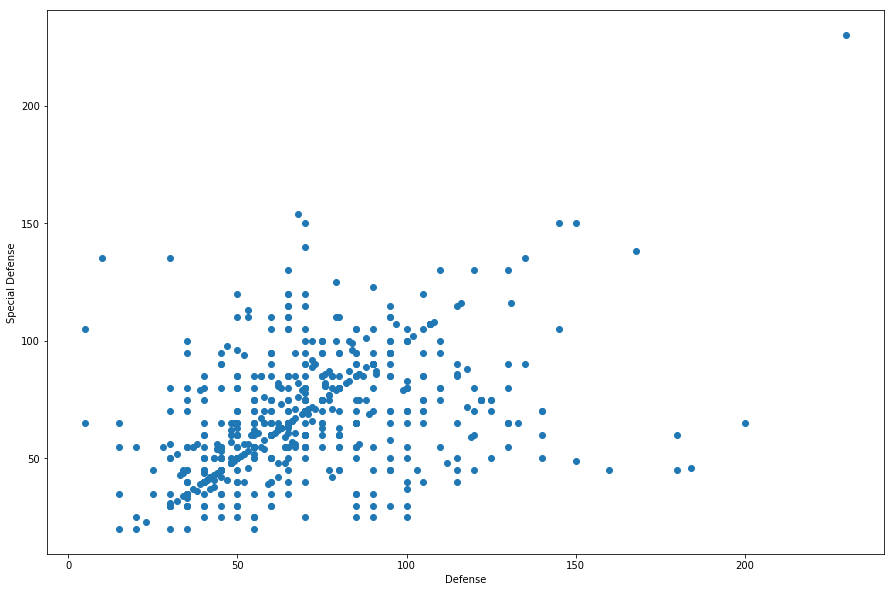

In [19]:
plt.figure(figsize = (15,10))
plt.scatter(corrdf['defense'],corrdf['sp_defense'])
plt.xlabel('Defense')
plt.ylabel('Special Defense')
plt.show()

In general, no pokemon seem to be outside of the general consensus of being abnormal within this correlation. Some pokemon seem to have higher values in one than the other based on the what is given but none shows as much impact as the other 3 correlation. <br>
Using our previous correlation graphs, it seems that Shuckles is at the very top right.

With some of the pokemons affecting our correlation, let's remove them and see whether this improves our values for correlation.* Look into updating this *

## Type ##

What we are going to start doing is to investigate how the types of pokemon go for their stats and whether there are some pokemons which are specifically stronger in some stats in comparison to others. Type 1 and Type 2 seem to be split which would be causing some issues so what we will do is combine the 2 columns into 1 and focus on the types and the stats.<br>
As a note, there will be pokemons with 2 types however we are focusing on the element and their stats.

In [20]:
type1pkm = normalpkm.drop("type_2",axis = 1)
type1pkm = type1pkm.rename(columns = {'type_1':'type'})
type2pkm = normalpkm.drop("type_1",axis = 1)
type2pkm = type2pkm.rename(columns = {'type_2':'type'})
type2pkm = type2pkm.dropna()
typepkm = pd.concat([type1pkm,type2pkm],sort = False)
typepkm = typepkm.sort_values(by = ['number'] ,ascending=True)
typepkm.head()

,number,name,type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
0,1,Bulbasaur,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
1,2,Ivysaur,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False


As intended, the data has been aggregated into 1 column to identify how elements do. Let's first observe how many unique values exist within the database

In [21]:
print(typepkm.type.unique())
len(typepkm.type.unique())

['Grass' 'Poison' 'Fire' 'Flying' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Steel' 'Ice' 'Ghost'
 'Dragon' 'Dark']


18

In [22]:
meantypepkm = typepkm.groupby(typepkm['type']).mean()

### Top 3 Elements by Stats ###

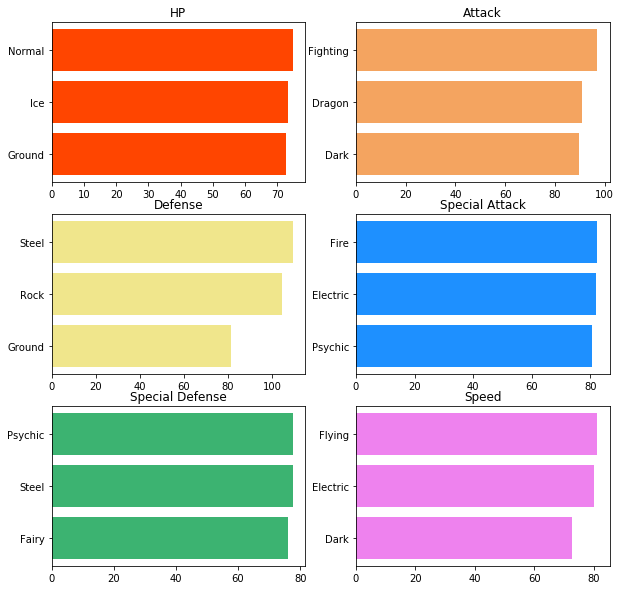

In [23]:
#Top 3 Elements
top3hp =meantypepkm.sort_values(by = ['hp'] ,ascending=False).head(3)
top3attack=meantypepkm.sort_values(by = ['attack'] ,ascending=False).head(3)
top3defense=meantypepkm.sort_values(by = ['defense'] ,ascending=False).head(3)
top3spattack =meantypepkm.sort_values(by = ['sp_attack'] ,ascending=False).head(3)
top3spdefense=meantypepkm.sort_values(by = ['sp_defense'] ,ascending=False).head(3)
top3speed=meantypepkm.sort_values(by = ['speed'] ,ascending=False).head(3)

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
plt.barh(top3hp.index,top3hp['hp'], color = 'orangered')
plt.title('HP')
plt.gca().invert_yaxis()

plt.subplot(3,2,2)
plt.barh(top3attack.index,top3attack['attack'],color ='sandybrown')
plt.title('Attack')
plt.gca().invert_yaxis()

plt.subplot(3,2,3)
plt.barh(top3defense.index,top3defense['defense'],color = 'khaki')
plt.title('Defense')
plt.gca().invert_yaxis()

plt.subplot(3,2,4)
plt.barh(top3spattack.index,top3spattack['sp_attack'],color = 'dodgerblue')
plt.title('Special Attack')
plt.gca().invert_yaxis()

plt.subplot(3,2,5)
plt.barh(top3spdefense.index,top3spdefense['sp_defense'],color = 'mediumseagreen')
plt.title('Special Defense')
plt.gca().invert_yaxis()

plt.subplot(3,2,6)
plt.barh(top3speed.index,top3speed['speed'],color = 'violet')
plt.title('Speed')
plt.gca().invert_yaxis()

### Bottom 3 Elements by Stats ###

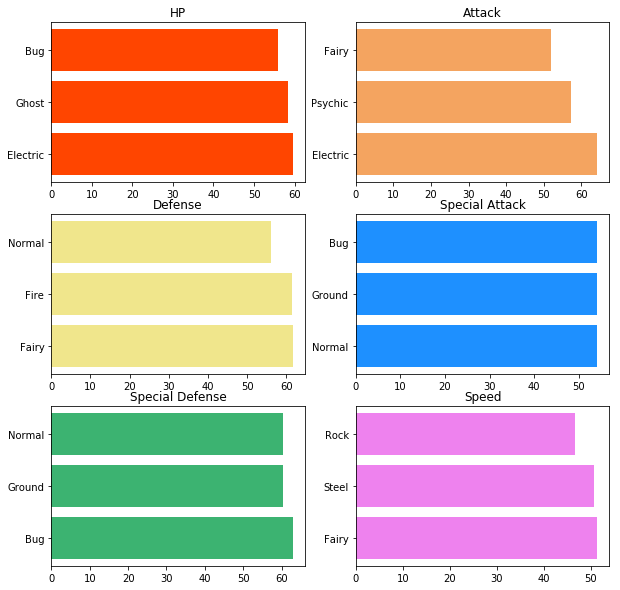

In [24]:
bottom3hp =meantypepkm.sort_values(by = ['hp'] ,ascending=True).head(3)
bottom3attack=meantypepkm.sort_values(by = ['attack'] ,ascending=True).head(3)
bottom3defense=meantypepkm.sort_values(by = ['defense'] ,ascending=True).head(3)
bottom3spattack =meantypepkm.sort_values(by = ['sp_attack'] ,ascending=True).head(3)
bottom3spdefense=meantypepkm.sort_values(by = ['sp_defense'] ,ascending=True).head(3)
bottom3speed=meantypepkm.sort_values(by = ['speed'] ,ascending=True).head(3)

plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.barh(bottom3hp.index,bottom3hp['hp'], color = 'orangered')
plt.title('HP')
plt.gca().invert_yaxis()

plt.subplot(3,2,2)
plt.barh(bottom3attack.index,bottom3attack['attack'],color ='sandybrown')
plt.title('Attack')
plt.gca().invert_yaxis()

plt.subplot(3,2,3)
plt.barh(bottom3defense.index,bottom3defense['defense'],color = 'khaki')
plt.title('Defense')
plt.gca().invert_yaxis()

plt.subplot(3,2,4)
plt.barh(bottom3spattack.index,bottom3spattack['sp_attack'],color = 'dodgerblue')
plt.title('Special Attack')
plt.gca().invert_yaxis()

plt.subplot(3,2,5)
plt.barh(bottom3spdefense.index,bottom3spdefense['sp_defense'],color = 'mediumseagreen')
plt.title('Special Defense')
plt.gca().invert_yaxis()

plt.subplot(3,2,6)
plt.barh(bottom3speed.index,bottom3speed['speed'],color = 'violet')
plt.title('Speed')
plt.gca().invert_yaxis()

In general, we can see how each element is doing in their category. Notable ones include the following:

- Normal Pokemon seems to have the highest average HP however this is offset with having the lowest average Defense and Special Defense
- Steel Pokemons seems to have the highest average Defense and second highest average special defense but also having the second lowest average speed
- Bug Pokemons have the lowest average HP and special attack with a decently low special defense average
- Ground Pokemons have the high average HP and defense which is offset with the low average special attack and special defense

### Total Stats by Elements ###

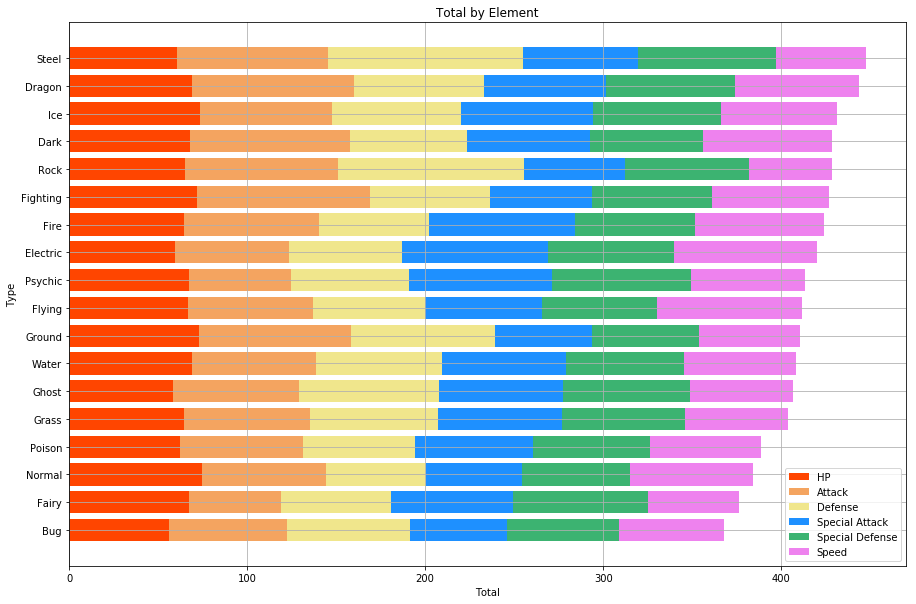

In [25]:
typebytotal = meantypepkm.sort_values(by='total',ascending = True)

plt.figure(figsize=(15,10))

p1 = typebytotal['hp']
p2 = np.add(p1,typebytotal['attack'])
p3 = np.add(p2,typebytotal['defense'])
p4 = np.add(p3,typebytotal['sp_attack'])
p5 = np.add(p4,typebytotal['sp_defense'])

plt.barh(typebytotal.index,typebytotal['hp'].tolist(), color = 'orangered')
plt.barh(typebytotal.index,typebytotal['attack'],left = p1.tolist(),color ='sandybrown')
plt.barh(typebytotal.index,typebytotal['defense'],left = p2.tolist(),color = 'khaki')
plt.barh(typebytotal.index,typebytotal['sp_attack'],left = p3.tolist(),color = 'dodgerblue')
plt.barh(typebytotal.index,typebytotal['sp_defense'],left = p4.tolist(),color = 'mediumseagreen')
plt.barh(typebytotal.index,typebytotal['speed'],left = p5.tolist(),color = 'violet')

plt.grid()
plt.legend(('HP','Attack','Defense','Special Attack','Special Defense','Speed'))
plt.xlabel('Total')
plt.ylabel('Type')
plt.title('Total by Element')
plt.show()

With their individual stats, we see some familiar elements with bug, Normal and Fairy. Posion and Grass showing up out of nowhere with no values within the bottom 3 tables which is a bit surprising.

- Steel having the highest average total stats. Looking at the distribution of stats, it seems our previous analysis holds true
- Bug, Normal and Fairy are at the bottom in terms of the average total stats. Most of these seems to be relevant with a lot of their average stats being in the bottom 3
- Dragon and Ice being the 2nd and 3rd highest average total scores. Based on our previous analysis, Ice had the 2nd highest average HP whereas Dragon had the 2nd highest attack
- Out of the three original starter element (Grass, Water and Fire), it seems that Fire has the highest average stat being 7th whereas Grass is the lowest at 13th

# Machine Learning#
So we've done some simple analysis on the pokemons and their elements. Pokemon is a popular evolving community with many new pokemons to be introduced and what we want to do is see whether we can create a model to identify whether a pokemon is legendary or not.

We will be splitting the data set into 2 parts. One part will be the training model which is what will be learned. The second part will be the test model where we see whether we can identify whether the pokemon is a legendary or not. We will be using our original data set for this scenario.

## Legendary Machine Learning ##

In [26]:
data.head()

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [27]:
X=data[['total','hp','attack','defense','sp_attack','sp_defense','speed']].copy()
y=data[['legendary']].copy()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [29]:
legendary_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
legendary_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
predictions = legendary_classifier.predict(X_test)

In [31]:
predictions[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [32]:
y_test['legendary'][:10]

538     True
183    False
373    False
32     False
718    False
127    False
394    False
251    False
118    False
757    False
Name: legendary, dtype: bool

In [33]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9583333333333334

Around 96% seems to be pretty decent meaning approximately 4% chance of not getting the correct categorization. These could be perhaps of high stats of non legendary pokemons overwriting legendary pokemons.<br> 
We currently have a dataset for Generation 7 pokemon which we shall investigate and integrate into our model.

In [34]:
gen7 = pd.read_csv('test.csv')
gen7.head()

,id,species,type1,type2,total,hp,attack,defense,spattack,spdefense,speed,generation,Legendary
0,722,Rowlet,Grass,Flying,320,68,55,55,50,50,42,7,False
1,723,Dartrix,Grass,Flying,420,78,75,75,70,70,52,7,False
2,724,Decidueye,Grass,Ghost,530,78,107,75,100,100,70,7,False
3,725,Litten,Fire,NaN,320,45,65,40,60,40,70,7,False
4,726,Torracat,Fire,NaN,420,65,85,50,80,50,90,7,False


First of all, we'll look into updating the columns again within this dataset.

In [35]:
gen7.rename(columns = {'species':'name', 
                       'type1':'type_1',
                       'type2': 'type_2',
                      'total': 'total',
                      'hp':'hp',
                      'attack' : 'attack',
                      'defense':'defense',
                      'spattack':'sp_attack',
                      'spdefense':'sp_defense',
                      'speed':'speed',
                      'generation':'generation',
                      'Legendary':'legendary',
                      'id':'number'},inplace = True)
gen7.head()

,number,name,type_1,type_2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,722,Rowlet,Grass,Flying,320,68,55,55,50,50,42,7,False
1,723,Dartrix,Grass,Flying,420,78,75,75,70,70,52,7,False
2,724,Decidueye,Grass,Ghost,530,78,107,75,100,100,70,7,False
3,725,Litten,Fire,NaN,320,45,65,40,60,40,70,7,False
4,726,Torracat,Fire,NaN,420,65,85,50,80,50,90,7,False


In [36]:
X2_test = gen7[['total','hp','attack','defense','sp_attack','sp_defense','speed']].copy()
y2_test = gen7['legendary'].copy()

In [37]:
predictions = legendary_classifier.predict(X2_test)

In [38]:
predictions[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [39]:
y2_test[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: legendary, dtype: bool

In [40]:
accuracy_score(y_true = y2_test, y_pred = predictions)

0.9012345679012346

In this case, it seems that the accuracy rate has dropped to around 90% which is still not bad. Seems like thet additions of evolution legendary pokemons may have skewed the results a bit which explains the decrease in accuracy of our prediction model. Nonetherless, 90% accuracy seems to still be an effective way of classifying legendary pokemons.